# Clustering - Flight Customer Segmentation

## Exploratory Data Analysis

Anggota Team 4:
*   Akhmad Yuzfa Salvian Idris
*   Arief Rahman Hakim
*   Bernardus Valentino
*   Milenia Nadia Afifah Puspitasari
*   Sean Frederic Wijaya

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('flight.csv')
df

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,18375,5/20/2011,6/5/2013,Female,4,guangzhou,guangdong,CN,25.0,3/31/2014,...,0.0,1134,6/9/2013,297,4.000000,4,1,0.000000,12318,22
62984,36041,3/8/2010,9/14/2013,Male,4,foshan,guangdong,CN,38.0,3/31/2014,...,0.0,8016,1/3/2014,89,37.000000,60,14,0.000000,106972,43
62985,45690,3/30/2006,12/2/2006,Female,4,guangzhou,guangdong,CN,43.0,3/31/2014,...,0.0,2594,3/3/2014,29,166.000000,166,0,0.000000,0,0
62986,61027,2/6/2013,2/14/2013,Female,4,guangzhou,guangdong,CN,36.0,3/31/2014,...,0.0,3934,2/26/2013,400,12.000000,12,0,0.000000,0,0


Keterangan Features:

- MEMBER_NO-b : ID Member
- FFP_DATE : Frequent Flyer Program Join Date
- FIRST_FLIGHT_DATE : Tanggal Penerbangan pertama
- GENDER : Jenis Kelamin
- FFP_TIER : Tier dari Frequent Flyer Program
- WORK_CITY : Kota Asal
- WORK_PROVINCE : Provinsi Asal
- WORK_COUNTRY : Negara Asal
- AGE : Umur Customer
- LOAD_TIME : Tanggal data diambil 
- FLIGHT_COUNT : Jumlah penerbangan Customer
- BP_SUM : Rencana Perjalanan
- SUM_YR_1 : Fare Revenue (Total tarif pada tahun pertama)
- SUM_YR_2 : Votes Prices (Total tarif pada tahun kedua)
- SEG_KM_SUM : Total jarak(km) penerbangan yg sudah dilakukan
- LAST_FLIGHT_DATE : Tanggal penerbangan terakhir
- LAST_TO_END : Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir
- AVG_INTERVAL : Rata-rata jarak waktu
- MAX_INTERVAL : Maksimal jarak waktu
- EXCHANGE_COUNT : Jumlah penukaran
- avg_discount : Rata rata discount yang didapat customer
- Points_Sum : Jumlah poin yang didapat customer
- Point_NotFlight : point yang tidak digunakan oleh members

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

Kita dapat melihat bahwa :

*   Dataframe memiliki total 62988 baris dan 23 kolom
*   Dataframe masih memiliki null values di kolom GENDER, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY, AGE, SUM_YR_1, SUM_YR_2

Dari informasi di atas, kita bisa pisahkan kolom kategorical dan numerical sebagai berikut.

In [6]:
df.head(3)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26


In [7]:
cats = ['FFP_DATE','FIRST_FLIGHT_DATE','GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY','LOAD_TIME','LAST_FLIGHT_DATE']
nums = ['MEMBER_NO','FFP_TIER','AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','avg_discount','Points_Sum','Point_NotFlight']

*   Feature-feature yang seharusnya merupakan kategorik: FFP_TIER 
*   Feature-feature yang seharusnya datetime: FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE

In [8]:
df[nums].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


*   Distribusi nilai hampir normal: FLIGHT_COUNT, AVG_INTERVAL, MAX_INTERVAL, EXCHANGE_COUNT, Point_NotFlight
*   Distribusi nilai tidak normal: BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, LAST_TO_END, Points_Sum

In [9]:
df[cats].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


*   Banyak feature yang jumlah uniknya terlalu banyak sehingga kemungkinan akan di drop atau dilakukan feature engineering

In [10]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom FFP_DATE:
1/13/2011     184
1/1/2013      165
3/1/2013      100
11/17/2010     99
1/14/2011      95
             ... 
10/4/2005       1
5/18/2009       1
11/29/2004      1
11/7/2004       1
5/19/2009       1
Name: FFP_DATE, Length: 3068, dtype: int64

Value count kolom FIRST_FLIGHT_DATE:
2/16/2013    96
9/30/2012    85
2/15/2013    84
9/9/2005     78
4/21/2012    70
             ..
3/2/2005      1
4/12/2009     1
2/20/2005     1
1/27/2005     1
12/7/2004     1
Name: FIRST_FLIGHT_DATE, Length: 3406, dtype: int64

Value count kolom GENDER:
Male      48134
Female    14851
Name: GENDER, dtype: int64

Value count kolom WORK_CITY:
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: WORK_CITY, Length: 3234, dtype: int64

Value count kolom WORK_PROVINCE:
guangdong        17509
beijing           8014
shanghai          4998
liao

*   Flight didominasi oleh male
*   Semua data diambil pada tanggal yang sama (LOAD_TIME hanya memiliki satu unique value)

### Univariate Analysis (Numerical Variabels)

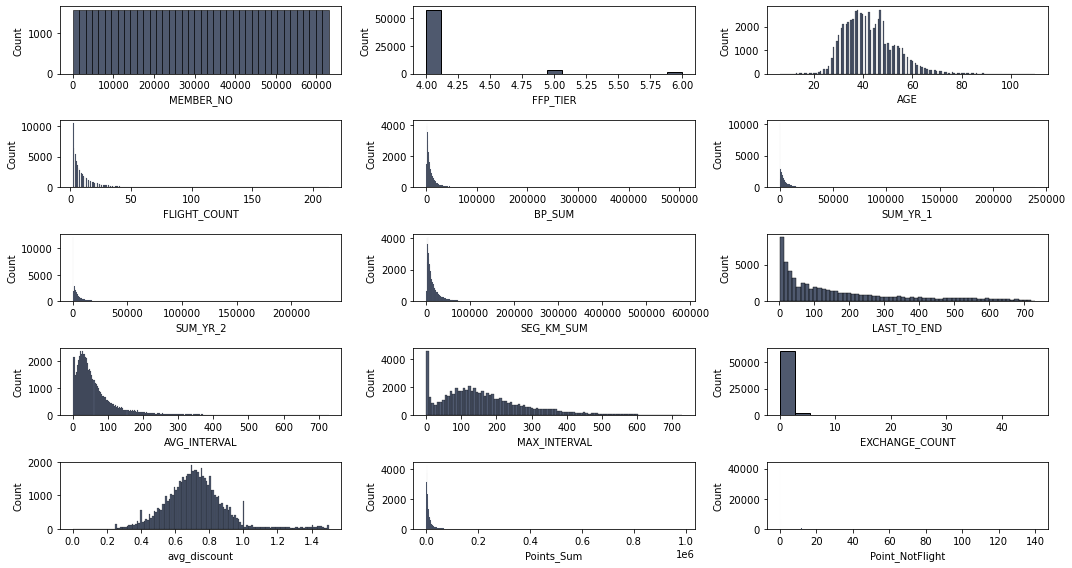

In [11]:
columns = ['MEMBER_NO','FFP_TIER','AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','avg_discount','Points_Sum','Point_NotFlight']
plt.figure(figsize=(15, 8))
for i in range(0, len(columns)):
    plt.subplot(5 , 3, i+1)
    sns.histplot(df[columns[i]], color='#14213d')
    plt.tight_layout()
plt.show()

Plot histogram untuk feature Point_NotFlight tidak terlihat karena terdapat outlier yang sangat jauh pada feature tersebut. Hal tersebut dapat dibuktikan oleh boxplot di bawah ini.

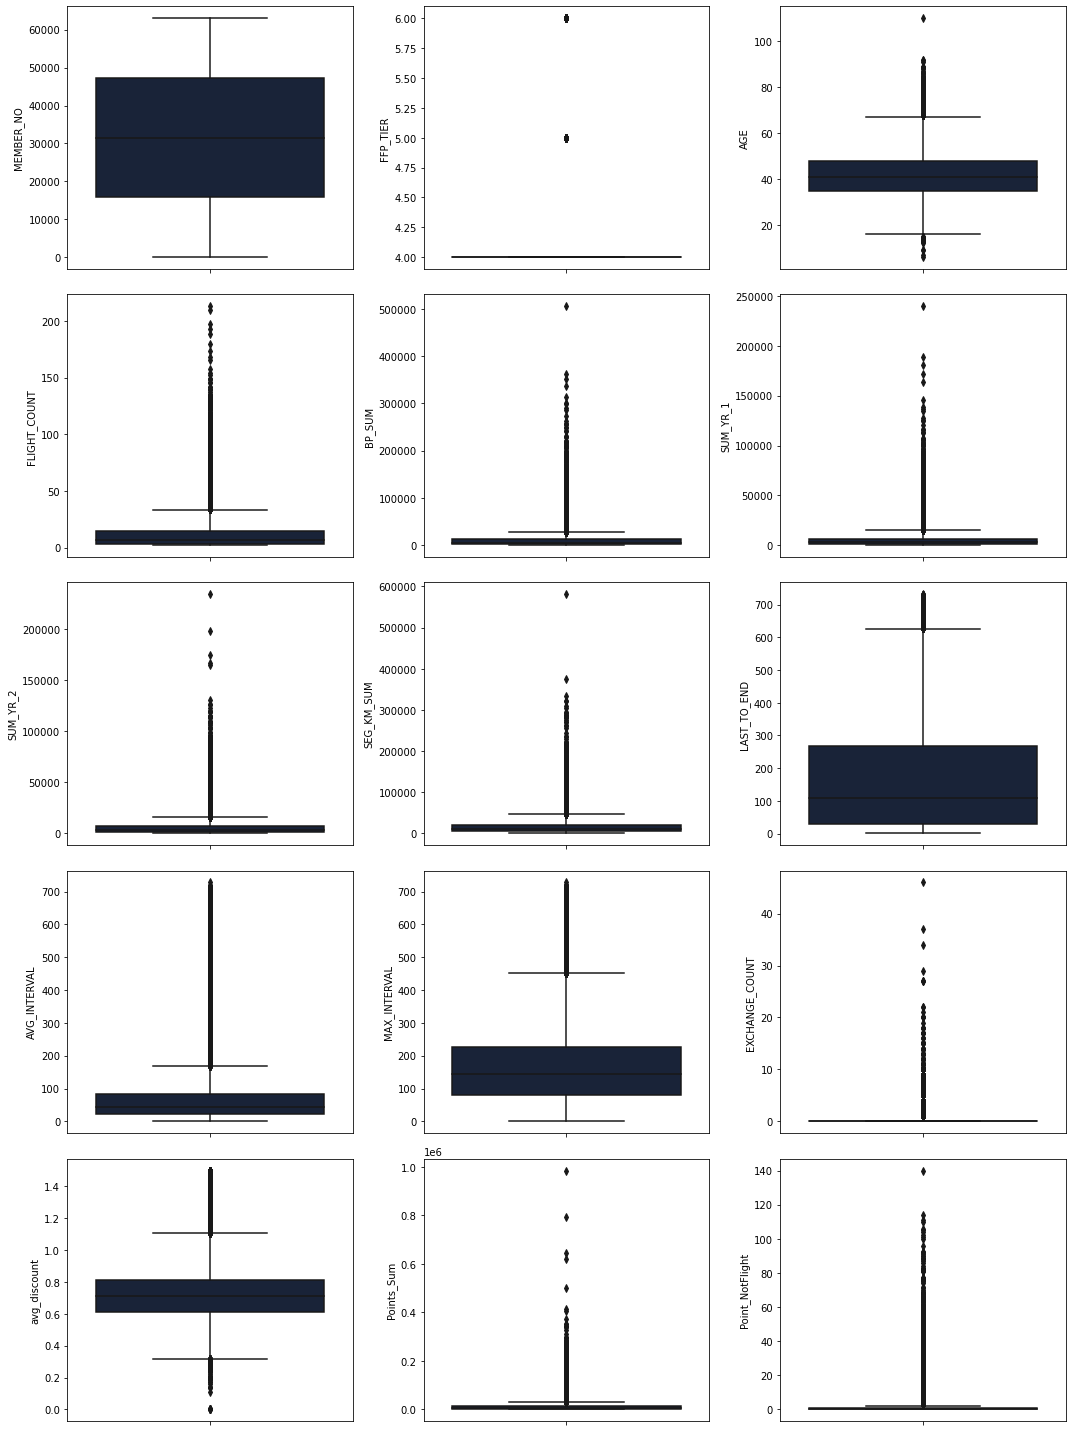

In [12]:
plt.figure(figsize=(15, 20))
for i in range(0, len(columns)):
    plt.subplot(5 , 3, i+1)
    sns.boxplot(y=df[columns[i]], color='#14213d', orient='v')
    plt.tight_layout()

- Semua feature memiliki outlier dan kebanyakan berdistribusi right skewed

#### Age

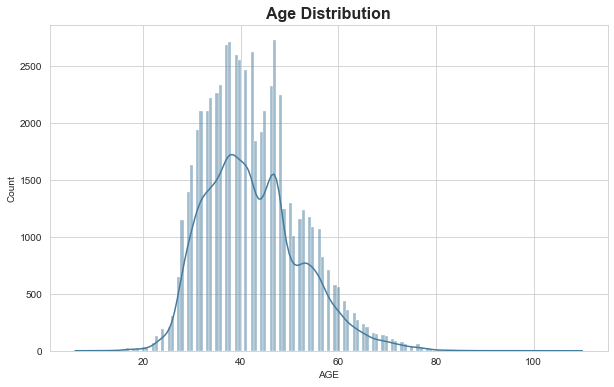

In [13]:
plt.figure(figsize = (10, 6))
sns.set_style('whitegrid')
sns.histplot(data=df, x='AGE', color='#457b9d', kde = True)
plt.title('Age Distribution', fontsize = 16, fontweight='bold')
plt.show()

In [14]:
df['AGE'].mean() 

42.47634573583941

- Rata-rata umur customer: 42.48 tahun

#### Average Discount

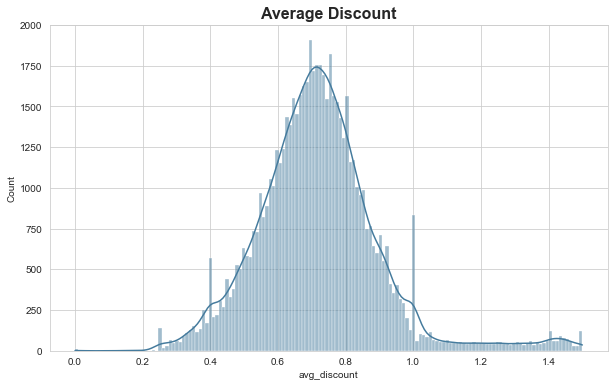

In [15]:
plt.figure(figsize = (10, 6))
sns.set_style('whitegrid')
sns.histplot(data=df, x='avg_discount', color='#457b9d', kde = True)
plt.title('Average Discount', fontsize = 16, fontweight='bold')
plt.show()

In [16]:
df['avg_discount'].mean() 

0.7215577705701454

- Rata-rata diskon dari keseluruhan flight yang dilakukan: 0.72 %

### Univariate Analysis (Categorical Variabels)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-p

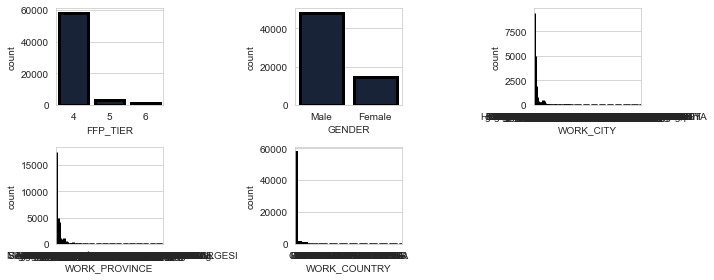

In [17]:
plt.figure(figsize=(10, 4))
column2 = ['FFP_TIER','GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY']

for i in range(0, len(column2)):
    plt.subplot(2, 3, i+1)
    sns.countplot(df[column2[i]], color='#14213d', orient='v',edgecolor='black',linewidth=3)
    plt.tight_layout()

- FFP_Tier dengan customer flight terbanyak: 4
- Gender customer flight terbanyak: Male

### EDA Conclusions

- Tidak ada data duplikat
- Dataframe masih memiliki null values di kolom GENDER, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY, AGE, SUM_YR_1, SUM_YR_2
- Feature-feature yang seharusnya merupakan kategorik: FFP_TIER
- Feature-feature yang seharusnya datetime: FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE
- Distribusi nilai hampir normal: FLIGHT_COUNT, AVG_INTERVAL, MAX_INTERVAL, EXCHANGE_COUNT, Point_NotFlight
- Distribusi nilai tidak normal: BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, LAST_TO_END, Points_Sum
- Banyak feature yang jumlah uniknya terlalu banyak sehingga kemungkinan akan di drop atau dilakukan feature engineering
- Semua feature memiliki outlier dan kebanyakan berdistribusi right skewed

## Data Preprocessing

In [18]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


### Merubah Tipe Data

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [20]:
df[df['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00']

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
248,56497,6/17/2007,6/17/2007,Female,6,guangzhou,guangdong,CN,46.0,3/31/2014,...,70845.0,85000,2014/2/29 0:00:00,32,13.250000,57,0,1.373478,132653,4
447,17306,8/26/2009,4/29/2010,Male,5,haerbin,heilongjiang,CN,70.0,3/31/2014,...,46323.0,69453,2014/2/29 0:00:00,32,22.766667,75,6,1.375395,101413,7
473,915,11/10/2006,1/26/2007,Male,5,.,beijing,CN,39.0,3/31/2014,...,30580.0,65717,2014/2/29 0:00:00,32,14.250000,65,1,1.425974,93153,8
832,20336,7/13/2005,8/6/2005,Male,5,guangzhou,guangdong,CN,40.0,3/31/2014,...,36417.0,114222,2014/2/29 0:00:00,32,8.696203,34,2,0.664970,91476,15
1051,62884,5/24/2006,4/21/2007,Male,5,wuhan,hubei,CN,50.0,3/31/2014,...,35680.0,49859,2014/2/29 0:00:00,32,19.115385,72,4,1.388584,69047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61539,55995,1/11/2013,7/10/2013,Male,4,dalianshi,liaoning,CN,23.0,3/31/2014,...,955.0,3513,2014/2/29 0:00:00,32,117.000000,211,0,0.276667,0,0
61871,48742,7/26/2009,7/26/2009,Male,4,tianjin,tianjin,CN,37.0,3/31/2014,...,966.0,1298,2014/2/29 0:00:00,32,135.000000,135,0,0.690000,1094,1
61909,9190,4/11/2011,4/20/2011,Male,4,guangzhou,guangdong,CN,34.0,3/31/2014,...,853.0,2595,2014/2/29 0:00:00,32,1.000000,1,0,0.340000,3356,19
62721,38776,10/31/2007,3/13/2008,Male,4,foshan,guangdong,CN,42.0,3/31/2014,...,688.0,1199,2014/2/29 0:00:00,32,78.000000,78,0,0.489525,276,0


In [21]:
df = df[df['LAST_FLIGHT_DATE'] != '2014/2/29  0:00:00']
df[df['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00']

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight


In [22]:
df['FFP_TIER'] = df['FFP_TIER'].astype('str')
df['FFP_DATE'] = df['FFP_DATE'].astype('datetime64[ns]')
df['FIRST_FLIGHT_DATE'] = df['FIRST_FLIGHT_DATE'].astype('datetime64[ns]')
df['LOAD_TIME'] = df['LOAD_TIME'].astype('datetime64[ns]')
df['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].astype('datetime64[ns]')

<ipython-input-22-cf11bf1a3715>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FFP_TIER'] = df['FFP_TIER'].astype('str')
<ipython-input-22-cf11bf1a3715>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FFP_DATE'] = df['FFP_DATE'].astype('datetime64[ns]')
<ipython-input-22-cf11bf1a3715>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62567 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62567 non-null  int64         
 1   FFP_DATE           62567 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62567 non-null  datetime64[ns]
 3   GENDER             62564 non-null  object        
 4   FFP_TIER           62567 non-null  object        
 5   WORK_CITY          60312 non-null  object        
 6   WORK_PROVINCE      59341 non-null  object        
 7   WORK_COUNTRY       62542 non-null  object        
 8   AGE                62148 non-null  float64       
 9   LOAD_TIME          62567 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62567 non-null  int64         
 11  BP_SUM             62567 non-null  int64         
 12  SUM_YR_1           62016 non-null  float64       
 13  SUM_YR_2           62429 non-null  float64       
 14  SEG_KM

In [24]:
cats = ['FFP_TIER','GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY']
nums = ['MEMBER_NO','AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','avg_discount','Points_Sum','Point_NotFlight']

In [25]:
df[nums].describe()

,MEMBER_NO,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62567.000000,62148.000000,62567.000000,62567.000000,62016.000000,62429.000000,62567.000000,62567.000000,62567.000000,62567.000000,62567.000000,62567.000000,62567.000000,62567.000000
mean,31490.970799,42.481303,11.814391,10906.691786,5352.327839,5588.828205,17095.441159,177.089856,67.774899,165.886969,0.319306,0.721555,12524.515959,2.726533
std,18176.932860,9.886526,14.051878,16351.867568,8116.830365,8707.792799,20974.464921,184.057816,77.606573,123.393978,1.137151,0.185485,20524.415318,7.360838
min,1.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15756.500000,35.000000,3.000000,2509.000000,1005.750000,768.000000,4732.000000,29.000000,23.333333,79.000000,0.000000,0.611875,2764.000000,0.000000
50%,31482.000000,41.000000,7.000000,5681.000000,2800.000000,2756.000000,9959.000000,109.000000,44.642857,143.000000,0.000000,0.711826,6303.000000,0.000000
75%,47229.500000,48.000000,15.000000,12797.000000,6567.000000,6815.000000,21206.000000,269.000000,82.000000,227.000000,0.000000,0.809611,14249.000000,1.000000
max,62988.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000


In [26]:
df[cats].describe()

,FFP_TIER,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,62567,62564,60312,59341,62542
unique,3,2,3225,1161,118
top,4,Male,guangzhou,guangdong,CN
freq,57695,47806,9326,17395,57347


### Missing Value

In [27]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2255
WORK_PROVINCE        3226
WORK_COUNTRY           25
AGE                   419
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [28]:
df['AGE'].fillna(df['AGE'].mode()[0], inplace=True)
df['GENDER'].fillna(df['GENDER'].mode()[0], inplace=True)
df['SUM_YR_1'].fillna(df['SUM_YR_1'].median(), inplace=True)
df['SUM_YR_2'].fillna(df['SUM_YR_2'].median(), inplace=True)

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [29]:
df.dropna(inplace=True, subset=['WORK_CITY','WORK_PROVINCE','WORK_COUNTRY'])
df.isna().sum()

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

### Outliers

Menggunakan Z-score

In [30]:
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','avg_discount','Points_Sum','Point_NotFlight']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 58843
Jumlah baris setelah memfilter outlier: 51316


Digunakan Z-score karena terlalu banyak data yang harus didrop jika menggunakan kriteria outlier IQR 

### Feature Engineering

####  Length of Membership Time

In [31]:
df['Membership_Length'] = df['LOAD_TIME'] - df['FFP_DATE']
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,Membership_Length
1197,6737,2012-09-21,2012-09-21,Male,6,changchun,jilin,CN,46.0,2014-03-31,...,78464,2014-03-23,9,11.680851,39,0,0.836235,61677,1,556 days
1216,31964,2011-02-23,2011-03-14,Male,5,BONDY,GALLIENI,FR,27.0,2014-03-31,...,77042,2014-03-26,6,60.416667,259,0,0.844046,59544,0,1132 days
1305,44675,2007-08-02,2007-08-04,Male,5,wenzhou,zhejiang,CN,60.0,2014-03-31,...,79538,2014-03-06,26,14.244898,58,0,0.796850,58412,0,2433 days
1320,53994,2007-02-12,2007-02-13,Male,4,wulumuqishi,xinjiang,CN,50.0,2014-03-31,...,77225,2014-03-24,8,19.942857,67,1,0.817883,61576,4,2604 days
1331,30848,2009-07-19,2009-07-19,Male,5,guangzhou,guangdong,CN,32.0,2014-03-31,...,75716,2014-03-31,1,14.916667,126,3,0.832198,61637,3,1716 days


In [32]:
df['Membership_Length'] = df['Membership_Length'].astype('str')
df['Membership_Length'] = df['Membership_Length'].str.split().str[0]
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,Membership_Length
1197,6737,2012-09-21,2012-09-21,Male,6,changchun,jilin,CN,46.0,2014-03-31,...,78464,2014-03-23,9,11.680851,39,0,0.836235,61677,1,556
1216,31964,2011-02-23,2011-03-14,Male,5,BONDY,GALLIENI,FR,27.0,2014-03-31,...,77042,2014-03-26,6,60.416667,259,0,0.844046,59544,0,1132
1305,44675,2007-08-02,2007-08-04,Male,5,wenzhou,zhejiang,CN,60.0,2014-03-31,...,79538,2014-03-06,26,14.244898,58,0,0.796850,58412,0,2433
1320,53994,2007-02-12,2007-02-13,Male,4,wulumuqishi,xinjiang,CN,50.0,2014-03-31,...,77225,2014-03-24,8,19.942857,67,1,0.817883,61576,4,2604
1331,30848,2009-07-19,2009-07-19,Male,5,guangzhou,guangdong,CN,32.0,2014-03-31,...,75716,2014-03-31,1,14.916667,126,3,0.832198,61637,3,1716


In [33]:
df['Membership_Length'] = df['Membership_Length'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51316 entries, 1197 to 62979
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          51316 non-null  int64         
 1   FFP_DATE           51316 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  51316 non-null  datetime64[ns]
 3   GENDER             51316 non-null  object        
 4   FFP_TIER           51316 non-null  object        
 5   WORK_CITY          51316 non-null  object        
 6   WORK_PROVINCE      51316 non-null  object        
 7   WORK_COUNTRY       51316 non-null  object        
 8   AGE                51316 non-null  float64       
 9   LOAD_TIME          51316 non-null  datetime64[ns]
 10  FLIGHT_COUNT       51316 non-null  int64         
 11  BP_SUM             51316 non-null  int64         
 12  SUM_YR_1           51316 non-null  float64       
 13  SUM_YR_2           51316 non-null  float64       
 14  SEG

####  The Average Fare per Kilometer

In [34]:
df['AvgFare_perKM']=(df['SUM_YR_1'] + df['SUM_YR_2'])/df['SEG_KM_SUM']
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,Membership_Length,AvgFare_perKM
1197,6737,2012-09-21,2012-09-21,Male,6,changchun,jilin,CN,46.0,2014-03-31,...,2014-03-23,9,11.680851,39,0,0.836235,61677,1,556,0.284067
1216,31964,2011-02-23,2011-03-14,Male,5,BONDY,GALLIENI,FR,27.0,2014-03-31,...,2014-03-26,6,60.416667,259,0,0.844046,59544,0,1132,0.546624
1305,44675,2007-08-02,2007-08-04,Male,5,wenzhou,zhejiang,CN,60.0,2014-03-31,...,2014-03-06,26,14.244898,58,0,0.796850,58412,0,2433,0.483065
1320,53994,2007-02-12,2007-02-13,Male,4,wulumuqishi,xinjiang,CN,50.0,2014-03-31,...,2014-03-24,8,19.942857,67,1,0.817883,61576,4,2604,0.685983
1331,30848,2009-07-19,2009-07-19,Male,5,guangzhou,guangdong,CN,32.0,2014-03-31,...,2014-03-31,1,14.916667,126,3,0.832198,61637,3,1716,0.581251


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51316 entries, 1197 to 62979
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          51316 non-null  int64         
 1   FFP_DATE           51316 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  51316 non-null  datetime64[ns]
 3   GENDER             51316 non-null  object        
 4   FFP_TIER           51316 non-null  object        
 5   WORK_CITY          51316 non-null  object        
 6   WORK_PROVINCE      51316 non-null  object        
 7   WORK_COUNTRY       51316 non-null  object        
 8   AGE                51316 non-null  float64       
 9   LOAD_TIME          51316 non-null  datetime64[ns]
 10  FLIGHT_COUNT       51316 non-null  int64         
 11  BP_SUM             51316 non-null  int64         
 12  SUM_YR_1           51316 non-null  float64       
 13  SUM_YR_2           51316 non-null  float64       
 14  SEG

In [36]:
data = df.copy().reset_index(drop = True)
data

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,Membership_Length,AvgFare_perKM
0,6737,2012-09-21,2012-09-21,Male,6,changchun,jilin,CN,46.0,2014-03-31,...,2014-03-23,9,11.680851,39,0,0.836235,61677,1,556,0.284067
1,31964,2011-02-23,2011-03-14,Male,5,BONDY,GALLIENI,FR,27.0,2014-03-31,...,2014-03-26,6,60.416667,259,0,0.844046,59544,0,1132,0.546624
2,44675,2007-08-02,2007-08-04,Male,5,wenzhou,zhejiang,CN,60.0,2014-03-31,...,2014-03-06,26,14.244898,58,0,0.796850,58412,0,2433,0.483065
3,53994,2007-02-12,2007-02-13,Male,4,wulumuqishi,xinjiang,CN,50.0,2014-03-31,...,2014-03-24,8,19.942857,67,1,0.817883,61576,4,2604,0.685983
4,30848,2009-07-19,2009-07-19,Male,5,guangzhou,guangdong,CN,32.0,2014-03-31,...,2014-03-31,1,14.916667,126,3,0.832198,61637,3,1716,0.581251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51311,1405,2010-07-07,2010-09-24,Male,4,guangzhou,guangdong,CN,44.0,2014-03-31,...,2012-12-24,464,4.000000,4,0,0.250000,0,0,1363,0.319343
51312,25238,2012-10-23,2012-10-23,Female,4,guangzhou,guangdong,CN,39.0,2014-03-31,...,2012-10-30,519,7.000000,7,0,0.250000,0,0,524,0.319343
51313,45524,2013-02-12,2013-04-03,Female,4,guangzhou,guangdong,CN,29.0,2014-03-31,...,2013-04-07,360,4.000000,4,0,0.250000,134,4,412,0.319343
51314,22761,2011-04-14,2011-04-14,Male,4,shantou,guangdongsheng,CN,48.0,2014-03-31,...,2013-06-24,282,0.000000,0,0,0.280000,0,0,1082,0.486842


### Normalization/Standardization

In [37]:
df.describe()

,MEMBER_NO,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,Membership_Length,AvgFare_perKM
count,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000
mean,31610.623158,41.855445,9.967281,8356.030887,4148.410457,4344.921759,14149.026152,186.279991,60.546945,159.398706,0.155604,0.702909,9049.079312,1.559163,1421.388670,0.630338
std,18163.272987,9.339319,9.288222,8479.857555,4641.651527,5148.408438,13186.574611,186.583136,52.696011,111.266724,0.511325,0.156149,9245.745640,4.304663,827.593956,0.275052
min,4.000000,14.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.171508,0.000000,0.000000,365.000000,0.000000
25%,15852.750000,35.000000,3.000000,2477.000000,960.000000,700.750000,4751.750000,35.000000,25.058824,80.000000,0.000000,0.605000,2693.000000,0.000000,700.000000,0.480274
50%,31739.000000,41.000000,7.000000,5368.000000,2662.500000,2622.000000,9595.000000,118.000000,45.400000,143.000000,0.000000,0.704366,5812.000000,0.000000,1192.000000,0.612579
75%,47394.250000,48.000000,13.000000,11222.000000,5724.500000,6034.000000,19040.500000,288.000000,79.500000,222.000000,0.000000,0.800000,12093.000000,1.000000,2103.000000,0.744179
max,62988.000000,71.000000,54.000000,59632.000000,29480.000000,31744.000000,79843.000000,726.000000,299.500000,535.000000,3.000000,1.273717,73006.000000,25.000000,3437.000000,5.761317


In [38]:
from sklearn.preprocessing import StandardScaler

for i in ['FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','Points_Sum','Point_NotFlight','Membership_Length','AvgFare_perKM']:
    df[i] = StandardScaler().fit_transform(df[i].values.reshape(len(df), 1))

df.describe()

,MEMBER_NO,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,Membership_Length,AvgFare_perKM
count,51316.000000,51316.000000,5.131600e+04,5.131600e+04,5.131600e+04,5.131600e+04,5.131600e+04,5.131600e+04,5.131600e+04,5.131600e+04,5.131600e+04,51316.000000,5.131600e+04,5.131600e+04,5.131600e+04,5.131600e+04
mean,31610.623158,41.855445,8.165275e-14,1.482445e-15,-4.852405e-14,5.330512e-14,1.965672e-16,-1.918049e-15,8.356702e-16,1.458720e-16,2.121360e-13,0.702909,1.098977e-15,-1.888587e-14,5.838818e-16,1.321641e-16
std,18163.272987,9.339319,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,0.156149,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,4.000000,14.000000,-8.577916e-01,-9.854072e-01,-8.937446e-01,-8.439432e-01,-1.045090e+00,-9.930254e-01,-1.148997e+00,-1.432596e+00,-3.043189e-01,0.171508,-9.787385e-01,-3.622067e-01,-1.276470e+00,-2.291731e+00
25%,15852.750000,35.000000,-7.501273e-01,-6.933003e-01,-6.869196e-01,-7.078318e-01,-7.126466e-01,-8.107992e-01,-6.734564e-01,-7.135959e-01,-3.043189e-01,0.605000,-6.874666e-01,-3.622067e-01,-8.716783e-01,-5.455919e-01
50%,31739.000000,41.000000,-3.194702e-01,-3.523715e-01,-3.201285e-01,-3.346546e-01,-3.453566e-01,-3.659530e-01,-2.874429e-01,-1.473834e-01,-3.043189e-01,0.704366,-3.501190e-01,-3.622067e-01,-2.771781e-01,-6.456943e-02
75%,47394.250000,48.000000,3.265155e-01,3.379770e-01,3.395569e-01,3.280809e-01,3.709471e-01,5.451779e-01,3.596713e-01,5.626292e-01,-3.043189e-01,0.800000,3.292271e-01,-1.298983e-01,8.236140e-01,4.138910e-01
max,62988.000000,71.000000,4.740751e+00,6.046855e+00,5.457505e+00,5.321906e+00,4.981932e+00,2.892680e+00,4.534601e+00,3.375717e+00,5.562843e+00,1.273717,6.917511e+00,5.445505e+00,2.435531e+00,1.865478e+01


In [39]:
from sklearn.preprocessing import MinMaxScaler

for i in ['AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','Points_Sum','avg_discount','Point_NotFlight','Membership_Length','AvgFare_perKM']:
    df[i] = MinMaxScaler().fit_transform(df[i].values.reshape(len(df), 1))

df.describe()

,MEMBER_NO,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,Membership_Length,AvgFare_perKM
count,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000
mean,31610.623158,0.488692,0.153217,0.140127,0.140719,0.136874,0.173401,0.255559,0.202160,0.297942,0.051868,0.482123,0.123950,0.062367,0.343877,0.109409
std,18163.272987,0.163848,0.178620,0.142203,0.157451,0.162185,0.165921,0.257356,0.175947,0.207975,0.170442,0.141669,0.126644,0.172187,0.269399,0.047741
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15852.750000,0.368421,0.019231,0.041538,0.032564,0.022075,0.055159,0.046897,0.083669,0.149533,0.000000,0.393294,0.036887,0.000000,0.109049,0.083362
50%,31739.000000,0.473684,0.096154,0.090019,0.090315,0.082598,0.116099,0.161379,0.151586,0.267290,0.000000,0.483446,0.079610,0.000000,0.269206,0.106326
75%,47394.250000,0.596491,0.211538,0.188188,0.194182,0.190083,0.234948,0.395862,0.265442,0.414953,0.000000,0.570211,0.165644,0.040000,0.565755,0.129168
max,62988.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
df.drop(columns=['MEMBER_NO'], inplace=True)
df.head()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,...,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,Membership_Length,AvgFare_perKM
1197,2012-09-21,2012-09-21,Male,6,changchun,jilin,CN,0.561404,2014-03-31,0.884615,...,2014-03-23,0.011034,0.039001,0.072897,0.000000,0.603087,0.844821,0.04,0.062174,0.049306
1216,2011-02-23,2011-03-14,Male,5,BONDY,GALLIENI,FR,0.228070,2014-03-31,0.211538,...,2014-03-26,0.006897,0.201725,0.484112,0.000000,0.610173,0.815604,0.00,0.249674,0.094878
1305,2007-08-02,2007-08-04,Male,5,wenzhou,zhejiang,CN,0.807018,2014-03-31,0.923077,...,2014-03-06,0.034483,0.047562,0.108411,0.000000,0.567353,0.800099,0.00,0.673177,0.083846
1320,2007-02-12,2007-02-13,Male,4,wulumuqishi,xinjiang,CN,0.631579,2014-03-31,0.653846,...,2014-03-24,0.009655,0.066587,0.125234,0.333333,0.586436,0.843438,0.16,0.728841,0.119067
1331,2009-07-19,2009-07-19,Male,5,guangzhou,guangdong,CN,0.315789,2014-03-31,0.903846,...,2014-03-31,0.000000,0.049805,0.235514,1.000000,0.599424,0.844273,0.12,0.439779,0.100889


In [41]:
df.describe()

,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,Membership_Length,AvgFare_perKM
count,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000,51316.000000
mean,0.488692,0.153217,0.140127,0.140719,0.136874,0.173401,0.255559,0.202160,0.297942,0.051868,0.482123,0.123950,0.062367,0.343877,0.109409
std,0.163848,0.178620,0.142203,0.157451,0.162185,0.165921,0.257356,0.175947,0.207975,0.170442,0.141669,0.126644,0.172187,0.269399,0.047741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.368421,0.019231,0.041538,0.032564,0.022075,0.055159,0.046897,0.083669,0.149533,0.000000,0.393294,0.036887,0.000000,0.109049,0.083362
50%,0.473684,0.096154,0.090019,0.090315,0.082598,0.116099,0.161379,0.151586,0.267290,0.000000,0.483446,0.079610,0.000000,0.269206,0.106326
75%,0.596491,0.211538,0.188188,0.194182,0.190083,0.234948,0.395862,0.265442,0.414953,0.000000,0.570211,0.165644,0.040000,0.565755,0.129168
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Selection

In [42]:
df.head()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,...,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,Membership_Length,AvgFare_perKM
1197,2012-09-21,2012-09-21,Male,6,changchun,jilin,CN,0.561404,2014-03-31,0.884615,...,2014-03-23,0.011034,0.039001,0.072897,0.000000,0.603087,0.844821,0.04,0.062174,0.049306
1216,2011-02-23,2011-03-14,Male,5,BONDY,GALLIENI,FR,0.228070,2014-03-31,0.211538,...,2014-03-26,0.006897,0.201725,0.484112,0.000000,0.610173,0.815604,0.00,0.249674,0.094878
1305,2007-08-02,2007-08-04,Male,5,wenzhou,zhejiang,CN,0.807018,2014-03-31,0.923077,...,2014-03-06,0.034483,0.047562,0.108411,0.000000,0.567353,0.800099,0.00,0.673177,0.083846
1320,2007-02-12,2007-02-13,Male,4,wulumuqishi,xinjiang,CN,0.631579,2014-03-31,0.653846,...,2014-03-24,0.009655,0.066587,0.125234,0.333333,0.586436,0.843438,0.16,0.728841,0.119067
1331,2009-07-19,2009-07-19,Male,5,guangzhou,guangdong,CN,0.315789,2014-03-31,0.903846,...,2014-03-31,0.000000,0.049805,0.235514,1.000000,0.599424,0.844273,0.12,0.439779,0.100889


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51316 entries, 1197 to 62979
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           51316 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  51316 non-null  datetime64[ns]
 2   GENDER             51316 non-null  object        
 3   FFP_TIER           51316 non-null  object        
 4   WORK_CITY          51316 non-null  object        
 5   WORK_PROVINCE      51316 non-null  object        
 6   WORK_COUNTRY       51316 non-null  object        
 7   AGE                51316 non-null  float64       
 8   LOAD_TIME          51316 non-null  datetime64[ns]
 9   FLIGHT_COUNT       51316 non-null  float64       
 10  BP_SUM             51316 non-null  float64       
 11  SUM_YR_1           51316 non-null  float64       
 12  SUM_YR_2           51316 non-null  float64       
 13  SEG_KM_SUM         51316 non-null  float64       
 14  LAS

In [44]:
df2 = df[['Membership_Length','AvgFare_perKM','avg_discount']]
df2 = df2.reset_index(drop=True)
df2

,Membership_Length,AvgFare_perKM,avg_discount
0,0.062174,0.049306,0.603087
1,0.249674,0.094878,0.610173
2,0.673177,0.083846,0.567353
3,0.728841,0.119067,0.586436
4,0.439779,0.100889,0.599424
...,...,...,...
51311,0.324870,0.055429,0.071213
51312,0.051758,0.055429,0.071213
51313,0.015299,0.055429,0.071213
51314,0.233398,0.084502,0.098431


## Clustering Model

### K-means

[1980.7859220479734, 1544.455065216658, 1187.002475048226, 1013.7487702750427, 868.0081402366163, 754.734458940214, 682.2904933272534, 624.2898285788358, 572.6277188369246, 532.9480124283041, 495.7159231755534, 462.58605576036246, 439.2756809537251]


<AxesSubplot:>

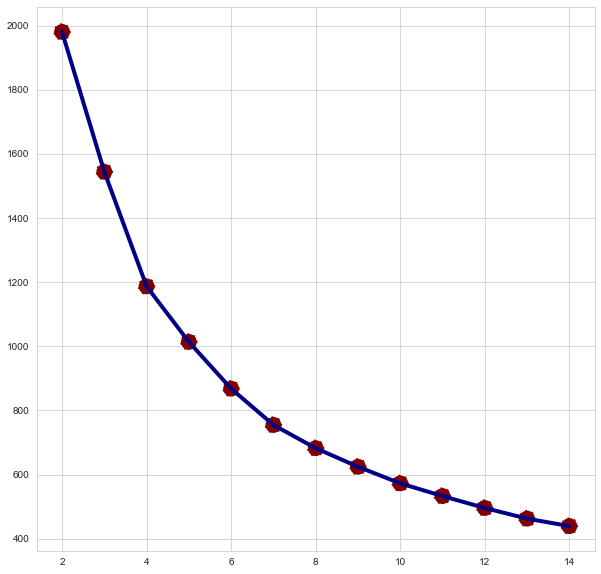

In [45]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df2.values)
    inertia.append(kmeans.inertia_)

print(inertia)

plt.figure(figsize=(10, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 15), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 15), y=inertia, s=300, color='#800000',  linestyle='--')

Cluster = 4

In [46]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df2)
df2['cluster'] = kmeans.labels_
df2.head()

,Membership_Length,AvgFare_perKM,avg_discount,cluster
0,0.062174,0.049306,0.603087,0
1,0.249674,0.094878,0.610173,0
2,0.673177,0.083846,0.567353,1
3,0.728841,0.119067,0.586436,1
4,0.439779,0.100889,0.599424,3


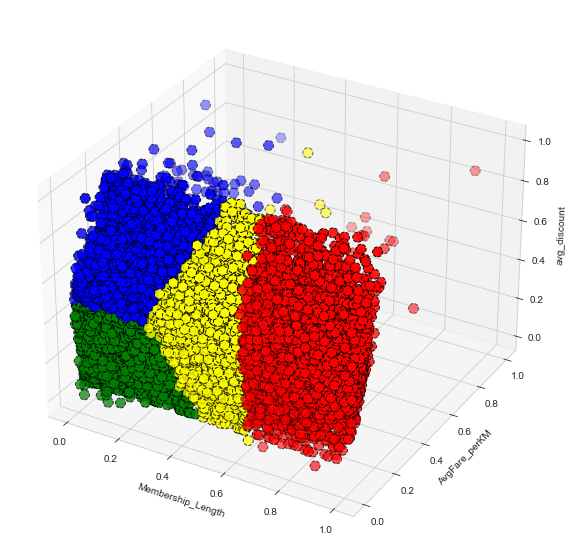

In [47]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2["Membership_Length"][df2.cluster == 0], df2["AvgFare_perKM"][df2.cluster == 0], df2["avg_discount"][df2.cluster == 0], c='blue', s=100, edgecolor='black',linestyle='--')
ax.scatter(df2["Membership_Length"][df2.cluster == 1], df2["AvgFare_perKM"][df2.cluster == 1], df2["avg_discount"][df2.cluster == 1],  c='red', s=100, edgecolor='black',linestyle='--')
ax.scatter(df2["Membership_Length"][df2.cluster == 2], df2["AvgFare_perKM"][df2.cluster == 2], df2["avg_discount"][df2.cluster == 2],  c='green', s=100, edgecolor='black',linestyle='--')
ax.scatter(df2["Membership_Length"][df2.cluster == 3], df2["AvgFare_perKM"][df2.cluster == 3], df2["avg_discount"][df2.cluster == 3],  c='yellow', s=100, edgecolor='black',linestyle='--')

plt.xlabel("Membership_Length")
plt.ylabel("AvgFare_perKM")
ax.set_zlabel('avg_discount')
plt.show()

In [48]:
data2 = data[['Membership_Length','AvgFare_perKM','avg_discount']]
data2['cluster'] = df2['cluster']
display(data2.groupby('cluster').agg(['mean','median']))

<ipython-input-48-181fa546c5d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['cluster'] = df2['cluster']


Membership_Length         AvgFare_perKM           avg_discount  \
                     mean  median          mean    median         mean   
cluster                                                                  
0              784.097665   746.0      0.763053  0.727623     0.817873   
1             2702.989010  2668.0      0.634205  0.624934     0.719469   
2              761.858020   713.0      0.486044  0.492998     0.559499   
3             1760.524932  1733.0      0.622492  0.612306     0.704104   

                   
           median  
cluster            
0        0.794670  
1        0.716401  
2        0.581882  
3        0.703049

## Conclusions

Terdapat 4 clusters customer penerbangan, yakni sebagai berikut:
1. cluster 0 (biru)
    - membership_length rendah : customer baru atau belum terlalu loyal
    - AvgFare_perKM paling tinggi: customer potensial karena tidak terlalu bermasalah dengan harga penerbangan yang ditawarkan
    - avg_discount paling tinggi: customer mendapatkan diskon yang tinggi karena memberikan revenue yang tinggi
    
    Conclusion: high value customer
2. cluster 1 (merah)
    - membership_length paling tinggi : customer lama sehingga sudah loyal
    - AvgFare_perKM standar: customer memberikan revenue yang cukup tinggi karena customer sering menggunakan penerbangan ini
    - avg_discount standar: customer mendapatkan diskon yang cukup tinggi karena memberikan revenue yang cukup tinggi
    
    Conclusion: loyal customer
3. cluster 2 (hijau)
    - membership_length paling rendah : customer baru sehingga belum loyal
    - AvgFare_perKM paling rendah : customer cenderung memilih penerbangan jika harganya murah
    - avg_discount paling rendah : customer mendapatkan diskon yang rendah karena memberikan revenue yang rendah
    
    Conclusion: low value customer
4. cluster 3 (kuning) 
    - membership_length rendah : customer cukup loyal
    - AvgFare_perKM paling tinggi: customer cenderung memilih penerbangan dengan harganya standar
    - avg_discount paling tinggi: customer mendapatkan diskon yang cukup tinggi karena memberikan revenue yang cukup tinggi
    
    Conclusion: general customer